In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
inspections = pd.read_csv('DOHMH_New_York_City_Restaurant_Inspection_Results.csv')

#### Initial review / EDA of restaurant inspection data

In [17]:
inspections.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
0,50113925,BAD HABITS,Queens,3203,BROADWAY,11106.0,3477385989,NaN,01/01/1900,NaN,...,NaN,40.761538,-73.924450,401.0,22.0,6100.0,4008406.0,4.006140e+09,QN70,NaN
1,50132324,NaN,Staten Island,81,WINANT PLACE,10309.0,9960317,NaN,01/01/1900,NaN,...,NaN,40.536829,-74.240246,503.0,51.0,22600.0,5095694.0,5.074000e+09,SI11,NaN
2,50128941,Londel's Supper Club,Manhattan,2620,FREDERICK DOUGLASS BOULEVARD,NaN,2122340601,NaN,01/01/1900,NaN,...,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN
3,50125033,NaN,Queens,8609,ROOSEVELT AVE,11372.0,3477715709,NaN,01/01/1900,NaN,...,NaN,40.748045,-73.880020,403.0,21.0,27900.0,4036259.0,4.014740e+09,QN28,NaN
4,50115776,DISCOVERY,Manhattan,230,PARK AVE S,10003.0,7043286907,NaN,01/01/1900,NaN,...,NaN,40.737875,-73.988749,105.0,2.0,5200.0,1016152.0,1.008470e+09,MN13,NaN


In [18]:
inspections.dtypes

CAMIS                      int64
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
ZIPCODE                  float64
PHONE                     object
CUISINE DESCRIPTION       object
INSPECTION DATE           object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                    float64
GRADE                     object
GRADE DATE                object
RECORD DATE               object
INSPECTION TYPE           object
Latitude                 float64
Longitude                float64
Community Board          float64
Council District         float64
Census Tract             float64
BIN                      float64
BBL                      float64
NTA                       object
Location Point1          float64
dtype: object

In [19]:
inspections.describe()

,CAMIS,ZIPCODE,SCORE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,Location Point1
count,2.024670e+05,199669.000000,191591.000000,202167.000000,202167.000000,199067.000000,199067.000000,199067.000000,1.980430e+05,2.018370e+05,0.0
mean,4.729017e+07,10703.806064,22.001461,40.169377,-72.928098,253.097394,20.689145,29914.731000,2.559049e+06,2.446582e+09,NaN
std,4.137438e+06,593.567374,17.015877,4.735021,8.595933,129.527818,15.813652,31366.630995,1.339920e+06,1.332327e+09,NaN
min,3.007544e+07,8512.000000,0.000000,0.000000,-74.249101,101.000000,1.000000,100.000000,1.000000e+06,1.000000e+00,NaN
25%,4.160144e+07,10023.000000,11.000000,40.682895,-73.988840,106.000000,4.000000,8000.000000,1.050078e+06,1.010740e+09,NaN
50%,5.005626e+07,11101.000000,18.000000,40.730690,-73.956300,302.000000,20.000000,17401.000000,3.018442e+06,3.006920e+09,NaN
75%,5.009891e+07,11230.000000,29.000000,40.761559,-73.896173,401.000000,34.000000,42200.000000,4.003534e+06,4.002480e+09,NaN
max,5.013531e+07,14228.000000,157.000000,40.912822,0.000000,595.000000,51.000000,162100.000000,5.799501e+06,5.270001e+09,NaN


#### Initial Cleaning of dataset

In [20]:
# convert inspection data, grade data, and record data to datetime
inspections['INSPECTION DATE'] = pd.to_datetime(inspections['INSPECTION DATE'])
inspections['GRADE DATE'] = pd.to_datetime(inspections['GRADE DATE'])
inspections['RECORD DATE'] = pd.to_datetime(inspections['RECORD DATE'])

In [21]:
# record date is only when the database was last udpated, is not related to specific restaurant inspections
inspections['RECORD DATE'].unique()

array(['2023-04-24T00:00:00.000000000'], dtype='datetime64[ns]')

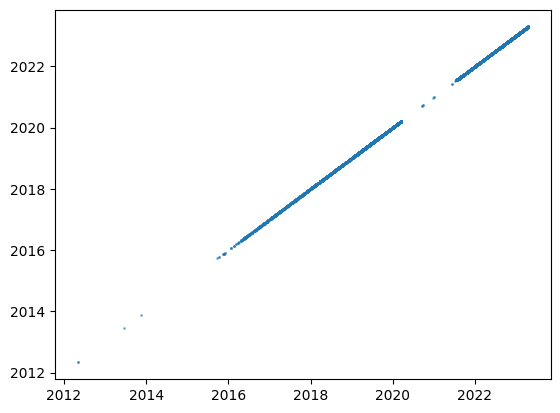

In [22]:
# plot of inspection date by grade date
plt.scatter(inspections['INSPECTION DATE'], inspections['GRADE DATE'], s=1, alpha=0.5)
plt.show()

In [23]:
# there is no differenc detween the inspection date and the grade date, so we only need one column
temp = inspections.copy()
temp['DATE DELTA']  = temp['GRADE DATE'] - temp['INSPECTION DATE']
temp['DATE DELTA'].unique()

array(['NaT',     0], dtype='timedelta64[ns]')

In [24]:
# inspect data with inspection dates in 1900
temp = inspections.copy()
temp = inspections[inspections['INSPECTION DATE'] == '1900-01-01']
temp.describe()

,CAMIS,ZIPCODE,SCORE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,Location Point1
count,4.292000e+03,4207.000000,0.0,4228.000000,4228.000000,4162.000000,4162.000000,4162.000000,4.095000e+03,4.219000e+03,0.0
mean,5.012187e+07,10663.045876,NaN,40.181255,-72.948528,245.136233,19.270303,28139.445699,2.482277e+06,2.341976e+09,NaN
std,9.760313e+03,603.456185,NaN,4.698196,8.529053,131.563688,15.570362,30580.471674,1.363728e+06,1.362970e+09,NaN
min,5.006988e+07,8512.000000,NaN,0.000000,-74.249101,101.000000,1.000000,100.000000,1.000000e+06,1.000000e+00,NaN
25%,5.011494e+07,10019.000000,NaN,40.693592,-73.989628,105.000000,3.000000,7125.000000,1.038530e+06,1.008600e+09,NaN
50%,5.012321e+07,10465.000000,NaN,40.733804,-73.960354,301.000000,19.000000,15400.000000,3.000256e+06,2.054270e+09,NaN
75%,5.013036e+07,11226.000000,NaN,40.760313,-73.906839,401.000000,33.000000,40500.000000,4.000569e+06,4.000325e+09,NaN
max,5.013531e+07,14228.000000,NaN,40.907189,0.000000,503.000000,51.000000,162100.000000,5.171653e+06,5.080460e+09,NaN


In [25]:
# data with an inspection date of 1900-01-01 has not been inspected or graded yet, so removing from the dataset
temp.GRADE.unique()

array([nan], dtype=object)

In [26]:
inspections = inspections[inspections['INSPECTION DATE']>'1901']
inspections.describe()

,CAMIS,ZIPCODE,SCORE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,Location Point1
count,1.981750e+05,195462.000000,191591.000000,197939.000000,197939.000000,194905.000000,194905.000000,194905.000000,1.939480e+05,1.976180e+05,0.0
mean,4.722884e+07,10704.683360,22.001461,40.169124,-72.927662,253.267397,20.719443,29952.640430,2.560670e+06,2.448816e+09,NaN
std,4.160734e+06,593.323508,17.015877,4.735816,8.597376,129.479000,15.817458,31382.185258,1.339369e+06,1.331579e+09,NaN
min,3.007544e+07,10000.000000,0.000000,0.000000,-74.248708,101.000000,1.000000,100.000000,1.000000e+06,1.000000e+00,NaN
25%,4.158542e+07,10023.000000,11.000000,40.682575,-73.988820,106.000000,4.000000,8000.000000,1.050200e+06,1.010860e+09,NaN
50%,5.005344e+07,11101.000000,18.000000,40.730629,-73.956244,302.000000,20.000000,17500.000000,3.018494e+06,3.006970e+09,NaN
75%,5.009606e+07,11230.000000,29.000000,40.761575,-73.896098,401.000000,34.000000,42200.000000,4.003558e+06,4.002660e+09,NaN
max,5.013478e+07,12345.000000,157.000000,40.912822,0.000000,595.000000,51.000000,162100.000000,5.799501e+06,5.270001e+09,NaN


In [27]:
# drop irrelevant columns
inspections = inspections.drop(['CAMIS', 'BUILDING', 'STREET', 'PHONE', 'GRADE DATE', 'RECORD DATE', 'BIN', 'BBL', 'Location Point1'], axis=1)
inspections.head()

,DBA,BORO,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
6,BLUJEEN,Manhattan,NaN,American,2018-02-23,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140º F.,Critical,12.0,A,Cycle Inspection / Re-inspection,0.000000,0.000000,NaN,NaN,NaN,NaN
13,POPPY'S,Brooklyn,11231.0,American,2021-08-12,Violations were cited in the following area(s).,22F,MISBRANDED AND LABELING,Not Critical,NaN,NaN,Administrative Miscellaneous / Re-inspection,40.685568,-74.002423,306.0,39.0,5100.0,BK33
24,EL CERRITO RESTAURANT,Bronx,NaN,Mexican,2023-01-30,Violations were cited in the following area(s).,02B,Hot TCS food item not held at or above 140 °F.,Critical,31.0,Z,Cycle Inspection / Re-inspection,0.000000,0.000000,NaN,NaN,NaN,NaN
38,Bar B,Manhattan,10011.0,Italian,2019-06-06,Violations were cited in the following area(s).,09B,Thawing procedures improper.,Not Critical,10.0,A,Cycle Inspection / Initial Inspection,40.739470,-73.999022,104.0,3.0,8100.0,MN13
47,CHRIS RESTAURANT,Queens,11419.0,Latin American,2020-01-23,Violations were cited in the following area(s).,10J,Hand wash sign not posted,Not Critical,21.0,NaN,Cycle Inspection / Initial Inspection,40.685768,-73.827518,410.0,28.0,9800.0,QN55


In [28]:
# filter out data that does not have lat / long
inspections = inspections[inspections['Latitude']>35]
inspections = inspections[inspections['Longitude']<-65]
inspections.describe()

,ZIPCODE,SCORE,Latitude,Longitude,Community Board,Council District,Census Tract
count,195226.000000,188730.000000,195226.000000,195226.000000,194905.000000,194905.000000,194905.000000
mean,10704.492066,22.047682,40.727342,-73.941117,253.267397,20.719443,29952.640430
std,593.248581,17.026021,0.068843,0.075410,129.479000,15.817458,31382.185258
min,10000.000000,0.000000,40.499563,-74.248708,101.000000,1.000000,100.000000
25%,10023.000000,11.000000,40.684939,-73.989080,106.000000,4.000000,8000.000000
50%,11101.000000,18.000000,40.732186,-73.957175,302.000000,20.000000,17500.000000
75%,11230.000000,29.000000,40.761974,-73.899759,401.000000,34.000000,42200.000000
max,12345.000000,157.000000,40.912822,-73.700928,595.000000,51.000000,162100.000000


In [31]:
inspections.head(3)

,DBA,BORO,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
13,POPPY'S,Brooklyn,11231.0,American,2021-08-12,Violations were cited in the following area(s).,22F,MISBRANDED AND LABELING,Not Critical,NaN,NaN,Administrative Miscellaneous / Re-inspection,40.685568,-74.002423,306.0,39.0,5100.0,BK33
38,Bar B,Manhattan,10011.0,Italian,2019-06-06,Violations were cited in the following area(s).,09B,Thawing procedures improper.,Not Critical,10.0,A,Cycle Inspection / Initial Inspection,40.739470,-73.999022,104.0,3.0,8100.0,MN13
47,CHRIS RESTAURANT,Queens,11419.0,Latin American,2020-01-23,Violations were cited in the following area(s).,10J,Hand wash sign not posted,Not Critical,21.0,NaN,Cycle Inspection / Initial Inspection,40.685768,-73.827518,410.0,28.0,9800.0,QN55


#### EDA on cleaned data

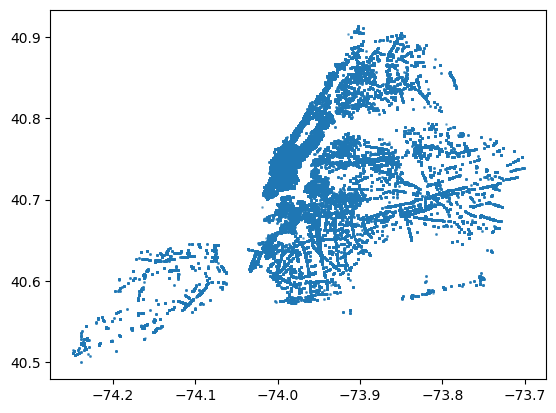

In [32]:
# plot restaurant lat / long on scatter plot to visualize locations
plt.scatter(inspections.Longitude, inspections.Latitude, s=1, alpha=0.5)
plt.show()

In [34]:
inspections['INSPECTION TYPE'].unique()

array(['Administrative Miscellaneous / Re-inspection',
       'Cycle Inspection / Initial Inspection',
       'Administrative Miscellaneous / Initial Inspection',
       'Pre-permit (Operational) / Initial Inspection',
       'Cycle Inspection / Re-inspection',
       'Administrative Miscellaneous / Compliance Inspection',
       'Cycle Inspection / Reopening Inspection',
       'Pre-permit (Non-operational) / Initial Inspection',
       'Pre-permit (Non-operational) / Re-inspection',
       'Inter-Agency Task Force / Initial Inspection',
       'Trans Fat / Initial Inspection',
       'Pre-permit (Operational) / Compliance Inspection',
       'Smoke-Free Air Act / Initial Inspection',
       'Pre-permit (Operational) / Re-inspection',
       'Smoke-Free Air Act / Re-inspection', 'Trans Fat / Re-inspection',
       'Pre-permit (Operational) / Reopening Inspection',
       'Smoke-Free Air Act / Limited Inspection',
       'Cycle Inspection / Compliance Inspection',
       'Pre-permit (O

<AxesSubplot:>

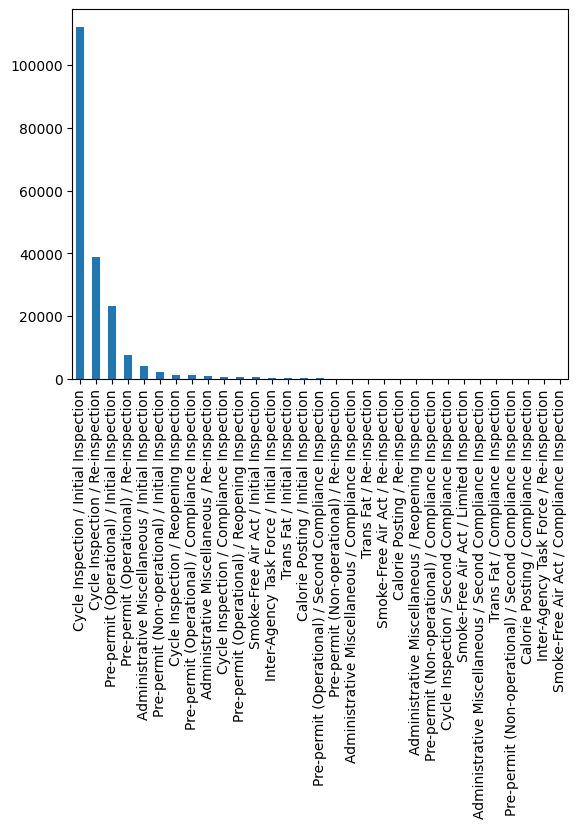

In [35]:
inspections['INSPECTION TYPE'].value_counts().plot(kind='bar')

In [36]:
inspections.ACTION.unique()

array(['Violations were cited in the following area(s).',
       'No violations were recorded at the time of this inspection.',
       'Establishment re-opened by DOHMH.',
       'Establishment Closed by DOHMH. Violations were cited in the following area(s) and those requiring immediate action were addressed.',
       'Establishment re-closed by DOHMH.'], dtype=object)

<AxesSubplot:>

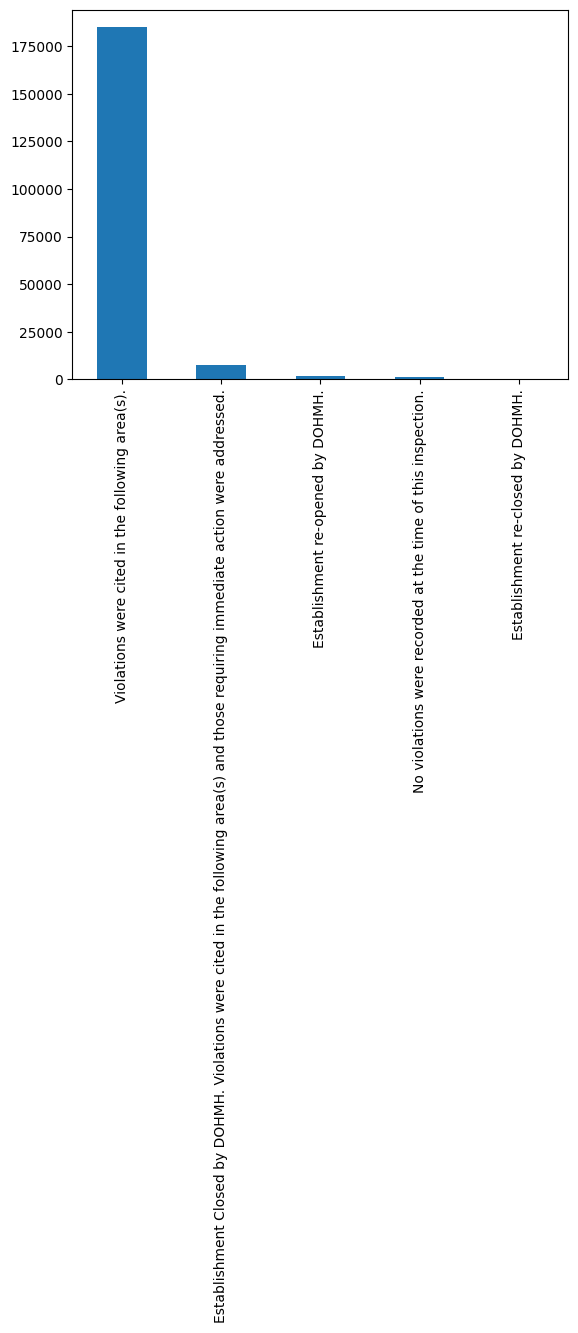

In [37]:
inspections.ACTION.value_counts().plot(kind='bar')

In [38]:
inspections['CUISINE DESCRIPTION'].unique()

array(['American', 'Italian', 'Latin American', 'Chinese', 'Pizza',
       'Coffee/Tea', 'Spanish', 'Southeast Asian', 'Donuts', 'French',
       'Indian', 'Jewish/Kosher', 'Sandwiches', 'Creole/Cajun', 'Mexican',
       'Chicken', 'Caribbean', 'Japanese', 'Bakery Products/Desserts',
       'African', 'Juice, Smoothies, Fruit Salads', 'Tex-Mex',
       'Bangladeshi', 'Greek', 'Frozen Desserts', 'German', 'Thai',
       'Bottled Beverages', 'Hamburgers', 'Pakistani', 'Other', 'Afghan',
       'Turkish', 'Polish', 'Hotdogs', 'Korean', 'English', 'Salads',
       'Steakhouse', 'Chinese/Japanese', 'Mediterranean', 'Irish',
       'Seafood', 'Asian/Asian Fusion', 'Vegetarian', 'Bagels/Pretzels',
       'Soups/Salads/Sandwiches', 'Chilean',
       'Sandwiches/Salads/Mixed Buffet', 'Russian', 'Eastern European',
       'Pancakes/Waffles', 'Portuguese', 'Peruvian', 'Middle Eastern',
       'Brazilian', 'Soups', 'Nuts/Confectionary', 'Soul Food', 'Tapas',
       'New American', 'Vegan', 'Fusion

<AxesSubplot:>

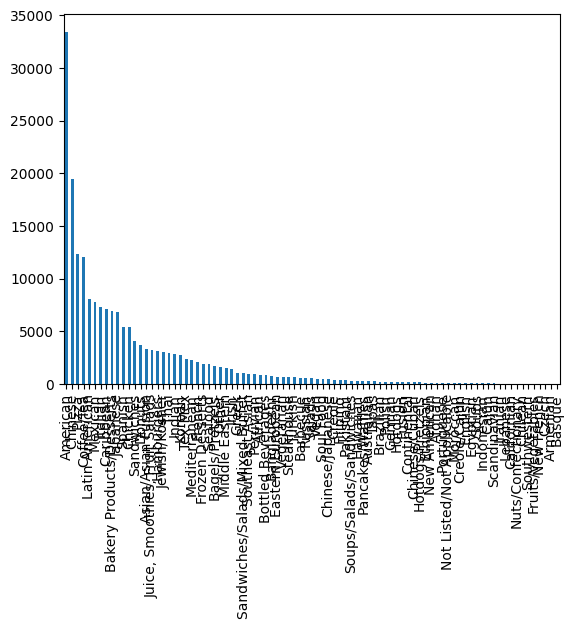

In [39]:
inspections['CUISINE DESCRIPTION'].value_counts().plot(kind='bar')

##### Inspection Grades

<AxesSubplot:>

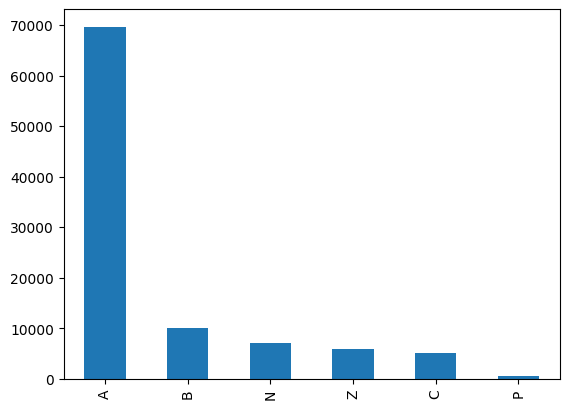

In [40]:
# "A" grade: 0 to 13 points for sanitary violations
# "B" grade: 14 to 27 points for sanitary violations
# "C" grade: 28 or more points for sanitary violations
# "P" grade: pending issued on re-opening following an initial inspection that resulted in a closure
# "Z" grade: grade pending
# "N" grade: not yet graded

inspections.GRADE.value_counts().plot(kind='bar')

In [43]:
inspections[inspections['GRADE'] == 'Z']['INSPECTION TYPE'].unique()

array(['Cycle Inspection / Re-inspection',
       'Cycle Inspection / Reopening Inspection',
       'Pre-permit (Operational) / Re-inspection',
       'Pre-permit (Operational) / Reopening Inspection',
       'Administrative Miscellaneous / Re-inspection'], dtype=object)

In [45]:
inspections[inspections['GRADE'] == 'N']

,DBA,BORO,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
142,Nai Brother & Yan Yan Tea,Queens,11354.0,Chinese,2023-02-14,Violations were cited in the following area(s).,02B,Hot TCS food item not held at or above 140 °F.,Critical,49.0,N,Pre-permit (Operational) / Initial Inspection,40.759051,-73.831623,407.0,20.0,87100.0,QN22
253,OKAWA,Queens,11372.0,Japanese,2023-01-04,Violations were cited in the following area(s).,02B,Hot TCS food item not held at or above 140 °F.,Critical,18.0,N,Cycle Inspection / Initial Inspection,40.749276,-73.888810,403.0,25.0,28700.0,QN28
311,SPRINGHILLS SUITES,Manhattan,10010.0,American,2022-04-04,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,0.0,N,Pre-permit (Non-operational) / Initial Inspection,40.740584,-73.985237,105.0,2.0,6800.0,MN21
316,GOTHAM SUPPLEMENTS,Manhattan,10031.0,"Juice, Smoothies, Fruit Salads",2019-11-20,Violations were cited in the following area(s).,10J,Hand wash sign not posted,Not Critical,21.0,N,Pre-permit (Non-operational) / Re-inspection,40.824174,-73.944664,109.0,9.0,23100.0,MN04
396,KARIBBEAN KRAVE,Bronx,10461.0,Caribbean,2022-08-12,Violations were cited in the following area(s).,09B,Thawing procedure improper.,Not Critical,42.0,N,Inter-Agency Task Force / Initial Inspection,40.841234,-73.842973,210.0,13.0,20000.0,BX37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202364,THOMASINA'S CATERING HALL,Queens,11412.0,American,2022-12-20,Violations were cited in the following area(s).,02H,"After cooking or removal from hot holding, TCS...",Critical,25.0,N,Cycle Inspection / Initial Inspection,40.695895,-73.747004,412.0,27.0,53200.0,QN34
202389,CHIPOTLE MEXICAN GRILL #3483,Queens,11435.0,Tex-Mex,2022-08-24,Violations were cited in the following area(s).,06C,"Food, supplies, and equipment not protected fr...",Critical,16.0,N,Pre-permit (Operational) / Initial Inspection,40.700828,-73.806551,412.0,27.0,20800.0,QN61
202391,THE JEFFREY,Manhattan,10022.0,American,2023-04-12,Violations were cited in the following area(s).,02G,Cold TCS food item held above 41 °F; smoked or...,Critical,21.0,N,Cycle Inspection / Initial Inspection,40.760909,-73.963076,108.0,5.0,11000.0,MN31
202424,SWEETS OF NY,Queens,11435.0,American,2022-10-24,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,16.0,N,Pre-permit (Operational) / Initial Inspection,40.698905,-73.806884,412.0,27.0,20800.0,QN61


<AxesSubplot:>

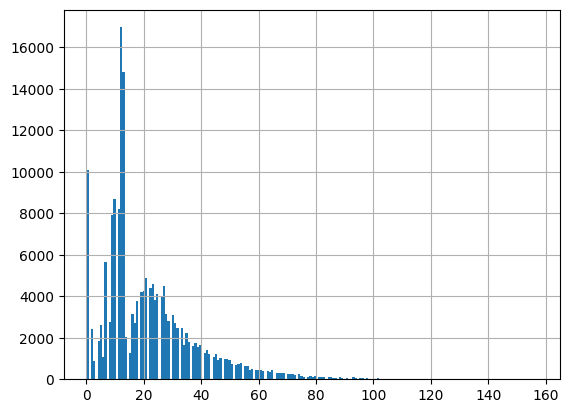

In [41]:
# inspection scores
inspections.SCORE.hist(bins=200)

##### Inspection types